In [1]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve
import matplotlib.patches as patches


##################머신러닝 모듈 ################

from sklearn.model_selection import train_test_split #사이킷런 import
from sklearn.linear_model import LinearRegression

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)


In [2]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'

data = pd.read_csv(file_url)
data

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [3]:
data.info() # column(열) 정보 , 결측치 아닌것들 COUNT , 자료형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [4]:
data.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [5]:
round(data.describe(), 2) #소수점 2자리까지만 통계정보량 출력

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


In [6]:
X = data[['age' , 'sex' , 'bmi' , 'children' , 'smoker']]  #독립변수

y = data['charges']  #종속변수


X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state= 100) #데이터 셋 분할
# test_size (시험 셋) ==> 20% , random_state = 100 ==> 랜덤 샘플링

#랜덤 샘플링이란 데이터를 특정 비율로 나눌 때 마구잡이로 뒤섞어서 나누는 것
#랜덤 샘플링을 진행하지 않는다면 데이터가 특정 순서로 정렬될 수 도 있다.

In [7]:
model = LinearRegression()  #선형회귀에 사용할 model 객체를 생성했으니 model 객체를 사용해서 선형 회귀로 학습하고 예측할 수 있게 된다.and

model.fit(X_train , y_train)
#객체.fit(독립변수, 종속변수)
#학습시킨다의 의미 : 데이터를 모델 안에 넣어서 독립변수와 종속변수 간의 관계들을 분석해 새로운 데이터를 예측할 수 있는 상태로 만드는 것이다.

LinearRegression()

In [8]:
pred = model.predict(X_test) #predict()함수로 예측을 할 수 있으며, 괄호 안에는 예측 대상을 넣어주면 된다.

In [9]:
comparison = pd.DataFrame({'actual' : y_test, 'pred' : pred})
#예측한 값은 pred에 , tlfwp wjdqhsms y_test에 저장되어 있다.
#예측값이 얼마나 정확한지는 pred와 y_test를 비교하는 것으로 단순하게 확인할 수 있다.
comparison

,actual,pred
12,1826.84300,4765.249466
306,20177.67113,4957.730865
318,7421.19455,8298.988153
815,1877.92940,3078.811868
157,15518.18025,24165.956542
...,...,...
713,1984.45330,5776.764928
1282,14283.45940,23102.847340
531,14043.47670,14280.732585
537,8825.08600,10527.417291


Text(45000, 22000, '실제값보다 예측값이 더 높게 나타났다.')

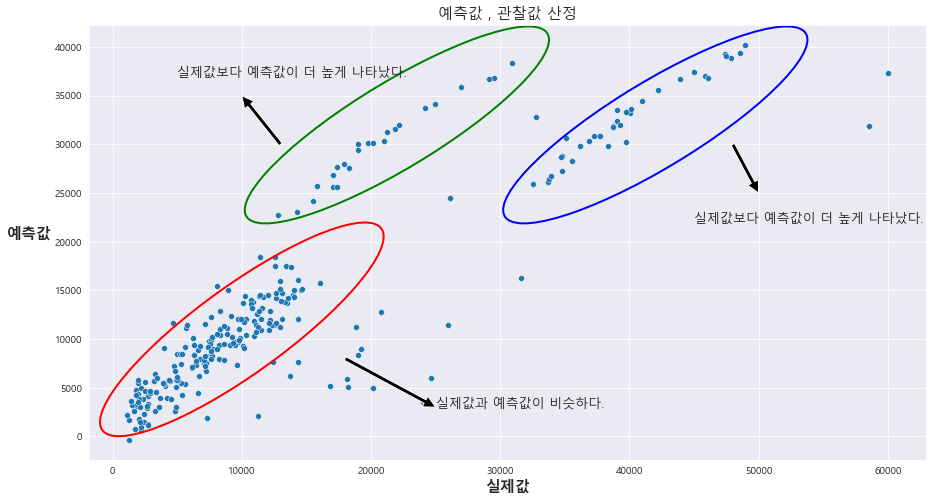

In [10]:
fig = plt.figure(figsize=(15,8))


x = comparison.iloc[:, 0].tolist()
y = comparison.iloc[: ,1].tolist()

# ax = sns.set_style('whitegrid')
ax = sns.scatterplot(x= x , y = y)
# ax = sns.lineplot(x= 'actual' , y = 'pred' , data = comparison)


ax.set_title('예측값 , 관찰값 산정' , fontsize=15)
ax.set_xlabel('실제값', fontsize = 15 , fontweight = 'bold')
ax.set_ylabel('예측값' , fontsize = 15 , fontweight = 'bold' , rotation = 0 , labelpad=25)






#####1번째
g_ell_center = (10000, 11000)
g_ell_width = 30000
g_ell_height = 8000
angle = 45.

g_ellipse = patches.Ellipse(g_ell_center, g_ell_width, g_ell_height, angle=angle, fill=False, edgecolor='red', linewidth=2)
ax.add_patch(g_ellipse)
plt.annotate('' , xy=(25000, 3000), xytext=(18000 , 8000)  , arrowprops = dict(facecolor = 'black'))
ax.text(25000 ,3000 , '실제값과 예측값이 비슷하다.'  , fontsize = 13)



#####2번째
g_ell_center = (22000, 32000)
g_ell_width = 30000
g_ell_height = 8000
angle = 40.

g_ellipse = patches.Ellipse(g_ell_center, g_ell_width, g_ell_height, angle=angle, fill=False, edgecolor='green', linewidth=2)
ax.add_patch(g_ellipse)
plt.annotate('' , xy=(10000, 35000), xytext=(13000 , 30000)  , arrowprops = dict(facecolor = 'black'))
ax.text(5000 ,37000 , '실제값보다 예측값이 더 높게 나타났다.'  , fontsize = 13)


#####3번째
g_ell_center = (42000, 32000)
g_ell_width = 30000
g_ell_height = 8000
angle = 40.

g_ellipse = patches.Ellipse(g_ell_center, g_ell_width, g_ell_height, angle=angle, fill=False, edgecolor='blue', linewidth=2)
ax.add_patch(g_ellipse)
plt.annotate('' , xy=(50000, 25000), xytext=(48000 , 30000)  , arrowprops = dict(facecolor = 'black'))
ax.text(45000 ,22000 , '실제값보다 예측값이 더 높게 나타났다.'  , fontsize = 13)

In [11]:
from sklearn.metrics import mean_squared_error #MSE 라이브러리
mean_squared_error(y_test,pred)**0.5 #RMSE를 위한 루트 씌우기

5684.927776334484

In [12]:
mean_squared_error(y_test,pred, squared= False)

5684.927776334484

In [13]:
model.score(X_train , y_train)

0.7368220127747351

In [14]:
X_train

,age,sex,bmi,children,smoker
1306,29,0,21.850,0,1
124,47,0,33.915,3,0
588,61,0,35.910,0,0
1127,35,0,35.860,2,0
201,48,0,32.230,1,0
...,...,...,...,...,...
802,21,1,22.300,1,0
53,36,1,34.430,0,1
350,57,0,23.180,0,0
79,41,0,32.965,0,0


In [15]:
predd = pd.Series(model.coef_ , index = X.columns)
predd

age           264.799803
sex            17.344661
bmi           297.514806
children      469.339602
smoker      23469.280173
dtype: float64

In [16]:
predd[1]

17.34466081707885

In [17]:
model.intercept_

-11576.999976112353

In [18]:
print(type(float(model.intercept_)))

<class 'float'>


In [19]:
print(type(predd[-1]))

<class 'numpy.float64'>


In [20]:
comparison

,actual,pred
12,1826.84300,4765.249466
306,20177.67113,4957.730865
318,7421.19455,8298.988153
815,1877.92940,3078.811868
157,15518.18025,24165.956542
...,...,...
713,1984.45330,5776.764928
1282,14283.45940,23102.847340
531,14043.47670,14280.732585
537,8825.08600,10527.417291


In [21]:
data

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


TypeError: can only concatenate list (not "int") to list

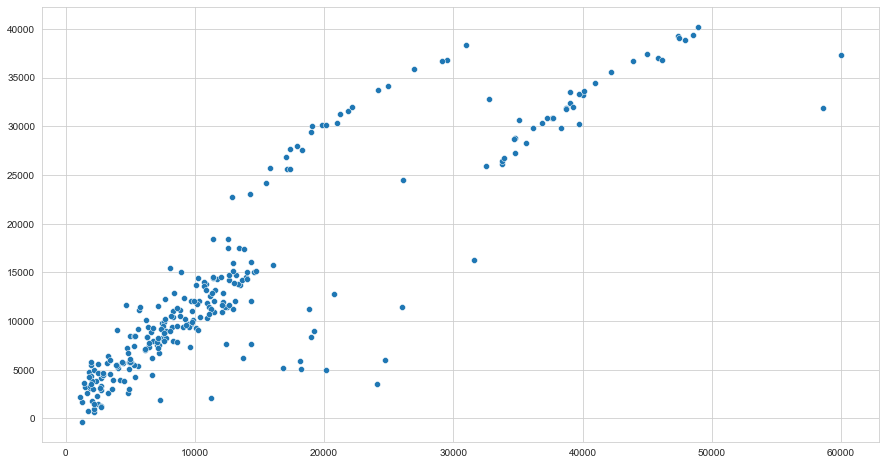

In [22]:
fig = plt.figure(figsize=(15,8))




def graph(x):
    return int(predd[-1]) * x + int(model.intercept_)

ax = sns.set_style('whitegrid')

x = comparison.iloc[:, 0].tolist()
y = comparison.iloc[: ,1].tolist()

# ax = sns.set_style('whitegrid')
ax = sns.scatterplot(x= x , y = y)
# x = data.iloc[:, -1]
# # ax = sns.lineplot(x= 'actual' , y = 'pred' , data = comparison)
#
ax = sns.lineplot(x= 'smoker' , y = graph(x) , data = data)

ax.set_title('예측값 , 관찰값 산정' , fontsize=15)
ax.set_xlabel('실제값', fontsize = 15 , fontweight = 'bold')
ax.set_ylabel('예측값' , fontsize = 15 , fontweight = 'bold' , rotation = 0 , labelpad=25)




#####1번째
g_ell_center = (10000, 11000)
g_ell_width = 30000
g_ell_height = 8000
angle = 45.

g_ellipse = patches.Ellipse(g_ell_center, g_ell_width, g_ell_height, angle=angle, fill=False, edgecolor='red', linewidth=2)
ax.add_patch(g_ellipse)
plt.annotate('' , xy=(25000, 3000), xytext=(18000 , 8000)  , arrowprops = dict(facecolor = 'black'))
ax.text(25000 ,3000 , '실제값과 예측값이 비슷하다.'  , fontsize = 13)



#####2번째
g_ell_center = (22000, 32000)
g_ell_width = 30000
g_ell_height = 8000
angle = 40.

g_ellipse = patches.Ellipse(g_ell_center, g_ell_width, g_ell_height, angle=angle, fill=False, edgecolor='green', linewidth=2)
ax.add_patch(g_ellipse)
plt.annotate('' , xy=(10000, 35000), xytext=(13000 , 30000)  , arrowprops = dict(facecolor = 'black'))
ax.text(5000 ,37000 , '실제값보다 예측값이 더 높게 나타났다.'  , fontsize = 13)


#####3번째
g_ell_center = (42000, 32000)
g_ell_width = 30000
g_ell_height = 8000
angle = 40.

g_ellipse = patches.Ellipse(g_ell_center, g_ell_width, g_ell_height, angle=angle, fill=False, edgecolor='blue', linewidth=2)
ax.add_patch(g_ellipse)
plt.annotate('' , xy=(50000, 25000), xytext=(48000 , 30000)  , arrowprops = dict(facecolor = 'black'))
ax.text(45000 ,22000 , '실제값보다 예측값이 더 높게 나타났다.'  , fontsize = 13)

In [ ]:
ax = sns.lmplot(x= X.columns , y= '최고' , data = A )